In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#在Jupyter Notebook中，使用matplotlib.pyplot绘图时，为了在需要显示图像的时候，不需要每次都调用plt.show()命令，通常使用魔法命令

#在Jupyter Notebok中使用matplotlib.pyplot绘图共有三种模式：
#（1）%matplotlib inline：默认模式，静态，非交互式
#（2）%matplotlib auto：在这个模式下会弹出一个单独的绘图窗口
#（3）%matplotlib notebook：和inline模式类似，只不过图像是交互式的，可以进行放大等操作

In [3]:
%matplotlib notebook

In [4]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


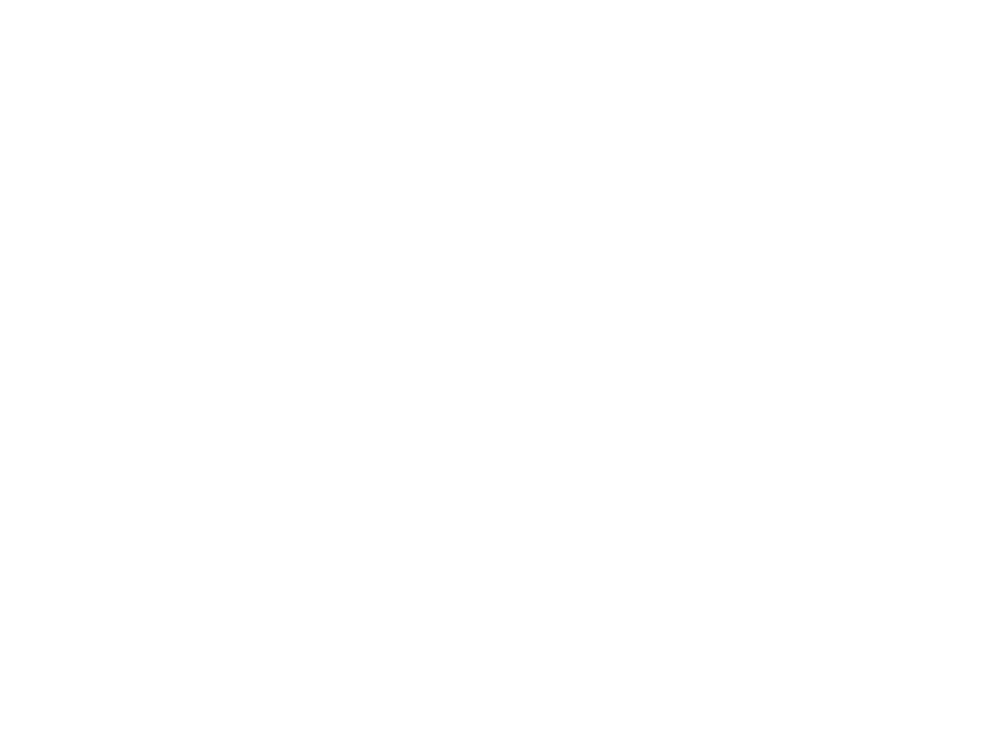

In [5]:
plt.plot(data)
#plot表示画线图（data为y轴的资料）

# Figure和Subplot

In [6]:
#matplotlib的图像都位于Figure对象中。你可以用plt.figure创建一个新的Figure：

<IPython.core.display.Javascript object>


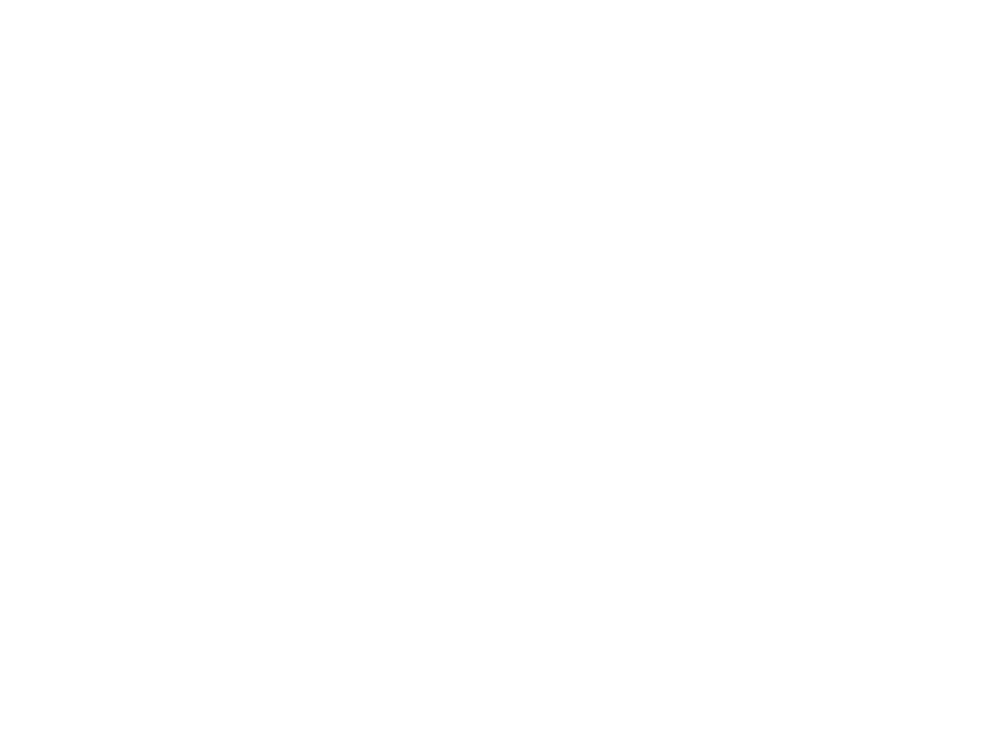

In [7]:
fig = plt.figure()

In [8]:
#如果用的是IPython，这时会弹出一个空窗口，但在Jupyter中，必须再输入更多命令才能看到。plt.figure有一些选项，特别是figsize，它用于确保当图片保存到磁盘时具有一定的大小和纵横比。

In [9]:
#不能通过空Figure绘图。必须用add_subplot创建一个或多个subplot才行：
ax1 = fig.add_subplot(2,2,1)
#这条代码的意思是：图像应该是2×2的（即最多4张图），且当前选中的是4个subplot中的第一个（编号从1开始）。

In [10]:
ax2 = fig.add_subplot(2, 2, 2)

In [11]:
ax3 = fig.add_subplot(2, 2, 3)

In [12]:
plt.plot(np.random.randn(50).cumsum(), 'k--')
#cumsum的作用主要就是计算轴向的累加和。'k--'k表示颜色，--表示虚线
#画在最近作用的图上

In [13]:
#k--"是一个线型选项，用于告诉matplotlib绘制黑色虚线图。上面那些由fig.add_subplot所返回的对象是AxesSubplot对象，直接调用它们的实例方法就可以在其它空着的格子里面画图了

In [14]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
#hist 语法& 参数注解
#x 为要绘制的数据，一维数组可用pandas的Series结构，二维数组使用DataFrame
#bins 指定条带bar 的总个数，个数越多，条形带越紧密。
#range :筛选数据范围，默认是最小到最大的取值范围
#normed :为True是频率图，默认False是频数图; 绘制概率密度函数pdf 和累计分布函数cdf时要指定normed=1；显示为每个条状图的占比例比；
#color  #条状图的颜色      facecolor #直方图颜色      edgecolor #直方图边框颜色      alpha  # 透明度
#histtype    #直方图类型，‘bar’, ‘barstacked’, ‘step’, ‘stepfilled’
#orientation # 水平或垂直方向          rwidth #柱子与柱子之间的距离，默认是0


(array([ 2.,  1.,  0.,  3.,  2.,  3.,  8.,  9.,  4., 13.,  7.,  6.,  9.,
         5., 10.,  4.,  5.,  3.,  5.,  1.]),
 array([-2.93030294, -2.69374658, -2.45719021, -2.22063385, -1.98407748,
        -1.74752112, -1.51096475, -1.27440839, -1.03785202, -0.80129565,
        -0.56473929, -0.32818292, -0.09162656,  0.14492981,  0.38148617,
         0.61804254,  0.85459891,  1.09115527,  1.32771164,  1.564268  ,
         1.80082437]),
 <a list of 20 Patch objects>)

In [15]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
#scatter函数是画散点图

In [16]:
#创建包含subplot网格的figure是一个非常常见的任务，matplotlib有一个更为方便的方法plt.subplots，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组：

<IPython.core.display.Javascript object>


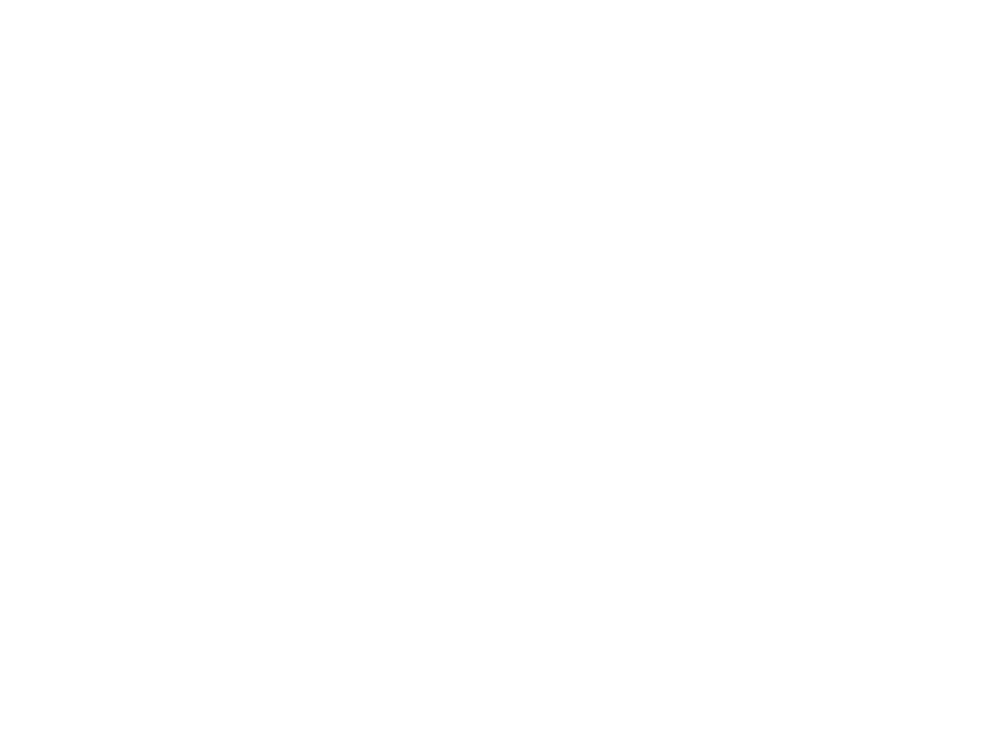

In [17]:
fig, axes = plt.subplots(2, 3)

In [18]:
axes
#这是非常实用的，因为可以轻松地对axes数组进行索引，就好像是一个二维数组一样，例如axes[0,1]。你还可以通过sharex和sharey指定subplot应该具有相同的X轴或Y轴。在比较相同范围的数据时，这也是非常实用的，否则，matplotlib会自动缩放各图表的界限。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CBC78CED00>,
      dtype=object)

# 调整subplot周围的间距

In [19]:
#默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关，因此，如果你调整了图像大小（不管是编程还是手工），间距也会自动调整。利用Figure的subplots_adjust方法可以轻而易举地修改间距，此外，它也是个顶级函数：
#subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

<IPython.core.display.Javascript object>


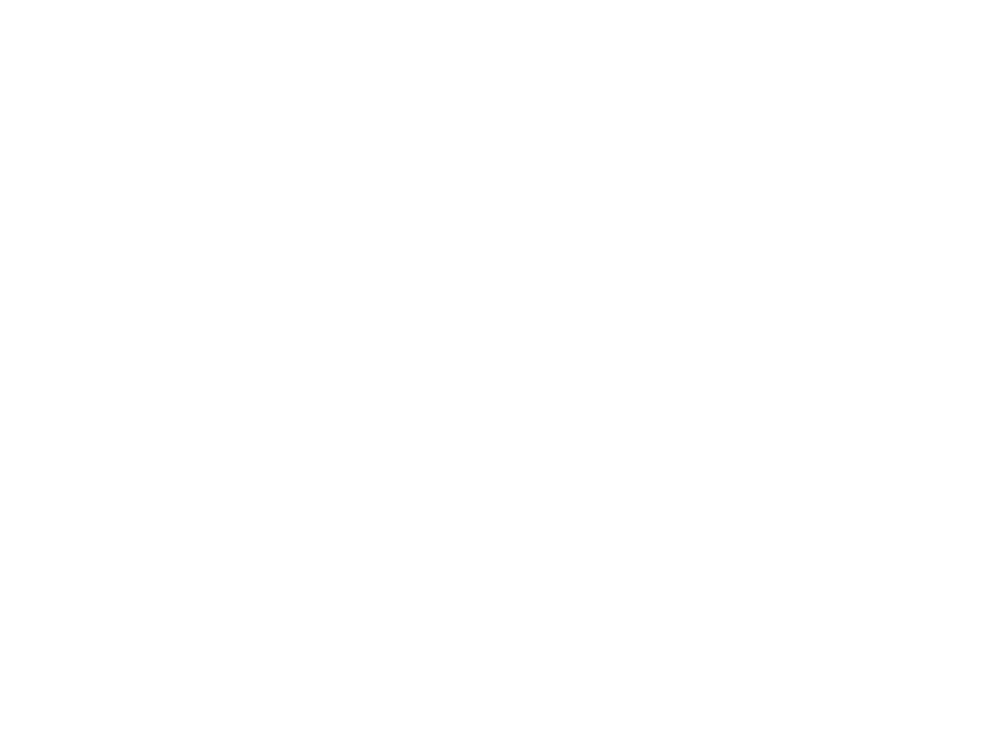

In [20]:
#wspace和hspace用于控制宽度和高度的百分比，可以用作subplot之间的间距。下面是一个简单的例子，其中我将间距收缩到了0
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [21]:
#不难看出，其中的轴标签重叠了。matplotlib不会检查标签是否重叠，所以对于这种情况，你只能自己设定刻度位置和刻度标签。
plt.close('all')#关闭 window，如果没有指定，则指当前 window。若不关闭，则下面的画图也会在上面显示

# 颜色、标记和线型

In [22]:
#matplotlib的plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写。
#线图可以使用标记强调数据点。因为matplotlib可以创建连续线图，在点之间进行插值，因此有时可能不太容易看出真实数据点的位置。标记也可以放到格式字符串中，但标记类型和线型必须放在颜色后面

<IPython.core.display.Javascript object>


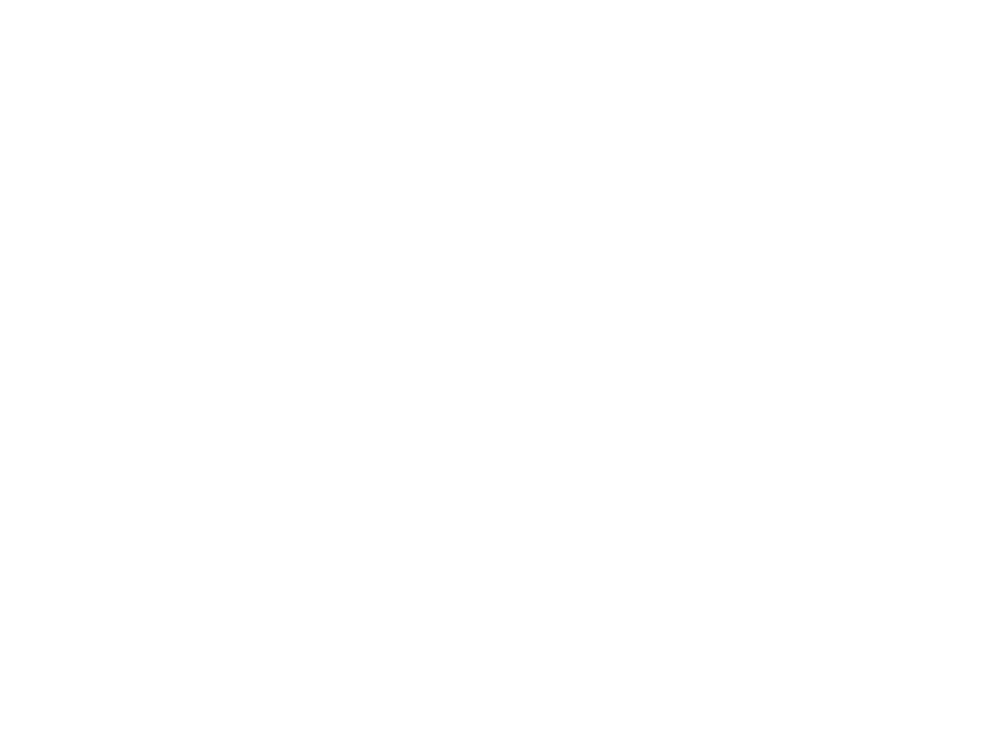

In [23]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

In [24]:
#在线型图中，非实际数据点默认是按线性方式插值的。可以通过drawstyle选项修改

In [25]:
#先把之前的fig关闭，否则会在之前的窗口继续画
plt.close('all')
data = np.random.randn(30).cumsum()

<IPython.core.display.Javascript object>


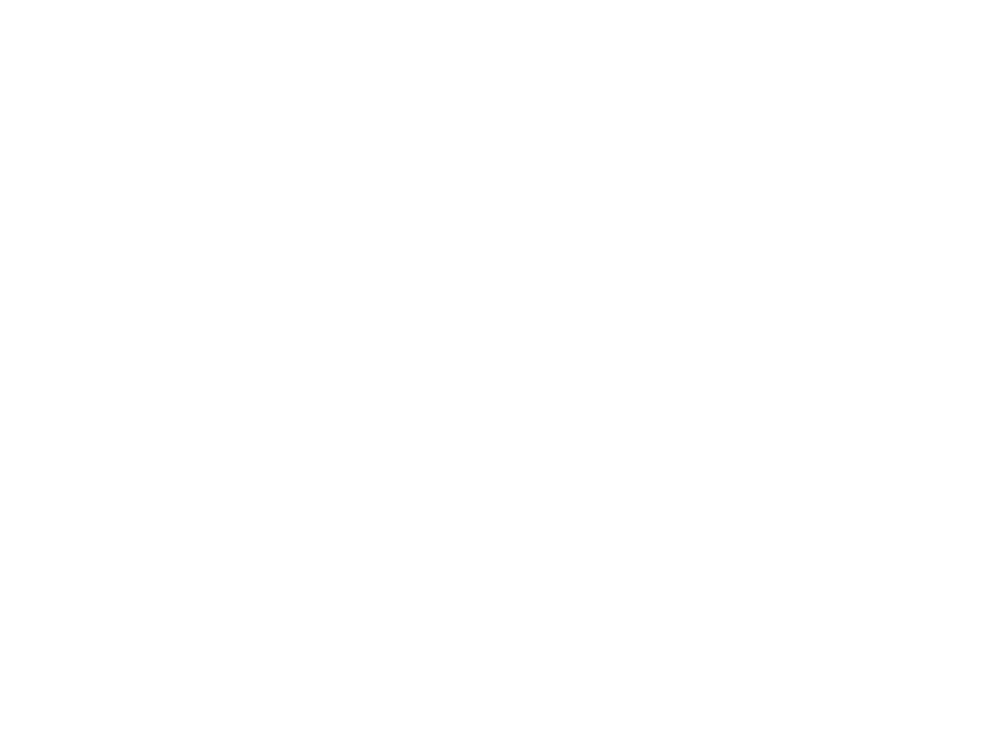

In [26]:
plt.plot(data, 'k--', label='Default')

In [27]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

In [28]:
plt.legend(loc='best')
plt.close('all')

# 刻度、标签和图例

In [29]:
#对于大多数的图表装饰项，其主要实现方式有二：使用过程型的pyplot接口（例如，matplotlib.pyplot）以及更为面向对象的原生matplotlib API。

#pyplot接口的设计目的就是交互式使用，含有诸如xlim、xticks和xticklabels之类的方法。它们分别控制图表的范围、刻度位置、刻度标签等。其使用方式有以下两种：

#调用时不带参数，则返回当前的参数值（例如，plt.xlim()返回当前的X轴绘图范围）。
#调用时带参数，则设置参数值（例如，plt.xlim([0,10])会将X轴的范围设置为0到10）。
#所有这些方法都是对当前或最近创建的AxesSubplot起作用的。它们各自对应subplot对象上的两个方法，以xlim为例，就是ax.get_xlim和ax.set_xlim。

# 设置标题、轴标签、刻度以及刻度标签

<IPython.core.display.Javascript object>


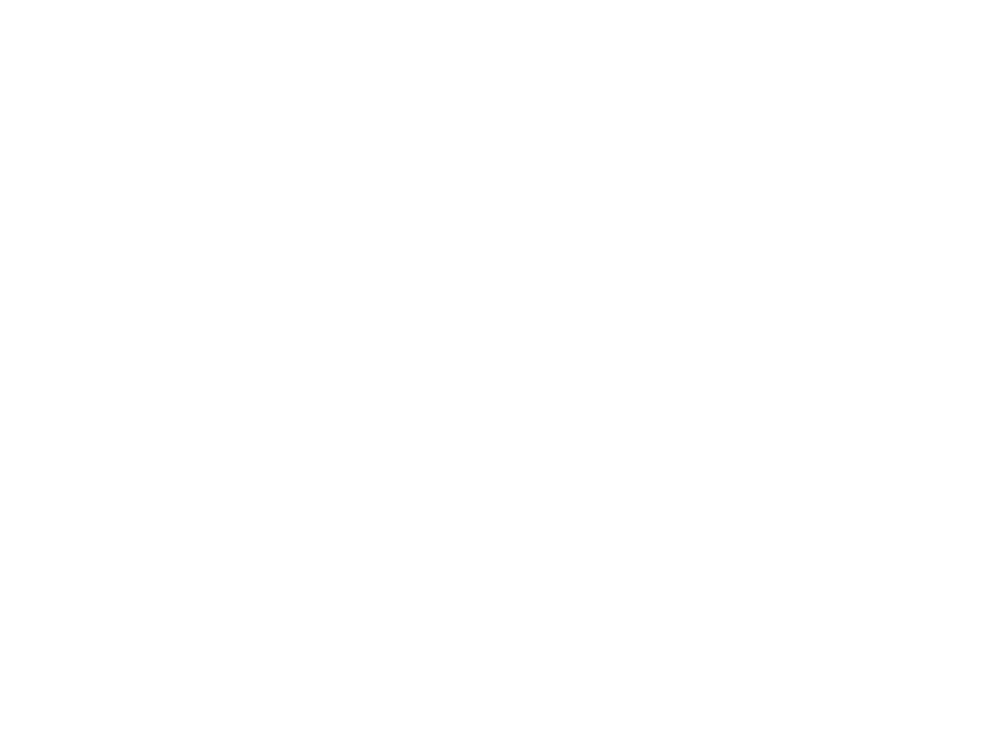

In [30]:
fig = plt.figure()

In [31]:
ax = fig.add_subplot(1, 1, 1)

In [32]:
ax.plot(np.random.randn(1000).cumsum())

In [33]:
#要改变x轴刻度，最简单的办法是使用set_xticks和set_xticklabels。前者告诉matplotlib要将刻度放在数据范围中的哪些位置，默认情况下，这些位置也就是刻度标签。但我们可以通过set_xticklabels将任何其他的值用作标签：

In [34]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [35]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],rotation=30, fontsize='small')
#rotation=30表示下面的one，two等等倾斜30度

In [36]:
#rotation选项设定x刻度标签倾斜30度。最后，再用set_xlabel为X轴设置一个名称，并用set_title设置一个标题
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [37]:
ax.set_xlabel('Stages')

Text(0.5, 0, 'Stages')

In [38]:
#Y轴的修改方式与此类似，只需将上述代码中的x替换为y即可。轴的类有集合方法，可以批量设定绘图选项。前面的例子，也可以写为：
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5, 0, 'Stages'), Text(0.5, 1.0, 'My first matplotlib plot')]

# 添加图例

In [39]:
#图例（legend）是另一种用于标识图表元素的重要工具。添加图例的方式有多种。最简单的是在添加subplot的时候传入label参数：

In [40]:
plt.close('all')

<IPython.core.display.Javascript object>


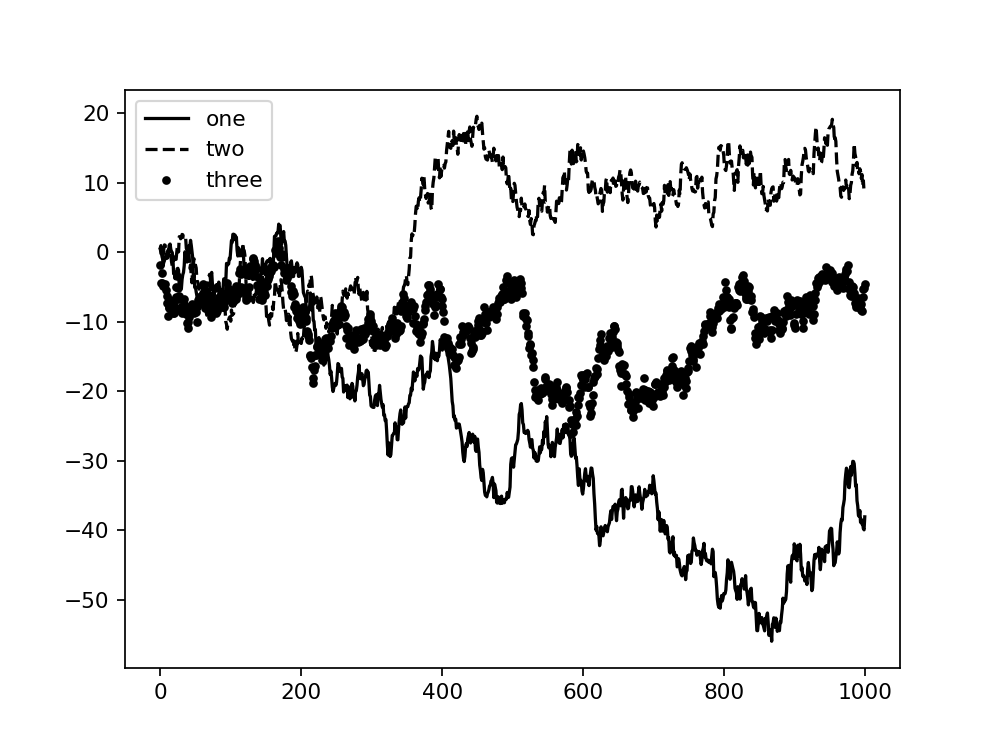

In [41]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [42]:
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [43]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')

In [44]:
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [45]:
#在此之后，你可以调用ax.legend()或plt.legend()来自动创建图例
ax.legend(loc='best')

# 注解以及在Subplot上绘图

In [46]:
#除标准的绘图类型，你可能还希望绘制一些子集的注解，可能是文本、箭头或其他图形等。注解和文字可以通过text、arrow和annotate函数进行添加。text可以将文本绘制在图表的指定坐标(x,y)，还可以加上一些自定义格式：

# 将图表保存到文件

In [48]:
#利用plt.savefig可以将当前图表保存到文件。该方法相当于Figure对象的实例方法savefig。例如，要将图表保存为SVG文件，你只需输入：
plt.savefig('figpath.pdf')

In [49]:
plt.savefig('figpath.png')